In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Load the Boston Housing dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=150, max_samples=0.8, n_jobs=-1)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate performance
mse = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.8758


In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Load the Boston Housing dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Regressor using Decision Tree as base estimator
bag_reg = BaggingRegressor(
    n_estimators=150,         # Number of trees in the ensemble
    max_samples=0.8,          # Use 80% of data for each model
    n_jobs=-1                 # Use all processors
)

# Train the model
bag_reg.fit(X_train, y_train)

# Predict on test data
y_pred = bag_reg.predict(X_test)

# Evaluate model performance using Mean Squared Error
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

R2: 0.8717755099995804


# Feature Importance in Random Forest

In [16]:
for importance,feature in (sorted(zip (rf_regressor.feature_importances_, df.columns[:-1]),reverse=True)):
        print(feature,importance)

rm 0.49222548379321823
lstat 0.3284779278659588
dis 0.05271511978056805
crim 0.03870231711362649
nox 0.01662194428134685
tax 0.01587074875023112
ptratio 0.01480259802633817
age 0.014123852787707478
b 0.012371301509784834
indus 0.006612193382273025
rad 0.005198447299631184
zn 0.0013030727494551825
chas 0.0009749926598605615


In [18]:
importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': rf_regressor.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
5,rm,0.492225
12,lstat,0.328478
7,dis,0.052715
0,crim,0.038702
4,nox,0.016622
9,tax,0.015871
10,ptratio,0.014803
6,age,0.014124
11,b,0.012371
2,indus,0.006612


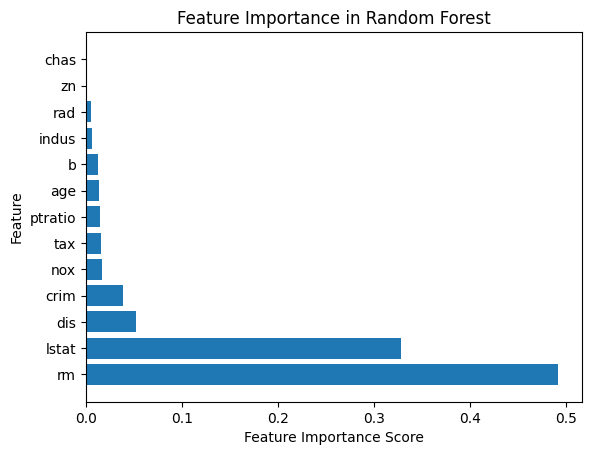

In [19]:
# Plot feature importance
import matplotlib.pyplot as plt

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

## Feature Importance of MNist

In [30]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'https://raw.githubusercontent.com/G1Codes/digit-recognizer/refs/heads/main/digit-recognizer_train.csv')

X = df.iloc[:,1:]
y = df.iloc[:,0]

<Axes: >

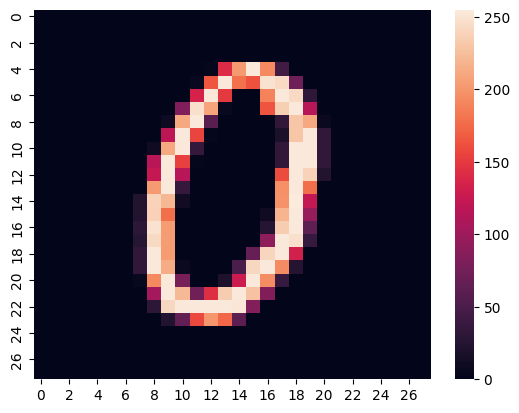

In [34]:
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

<Axes: >

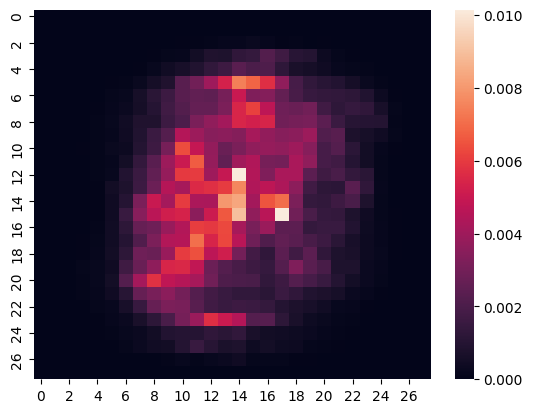

In [36]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

# Extremely Randomized Trees

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
